In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Подготовка данных

In [2]:
LabelEncoder = LabelEncoder()
scaler = StandardScaler() #Масштабирование

In [70]:
data = pd.read_csv("/content/survey lung cancer.csv") #читаем данные
data.tail(10) #10 последних
data_for_plot = data

In [71]:
data.info() # смотрим нули

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [72]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [104]:
len(data[data.duplicated() == True]) # ищем повторения

0

In [103]:
data.drop_duplicates(inplace = True)

In [74]:
data.GENDER = data.GENDER.replace({"M": "Male", "F": "Female"}) #Переименовываем пол в развернутую форму
data.LUNG_CANCER = LabelEncoder.fit_transform(data.LUNG_CANCER) #Превращаем "YES" и "NO" в 1 и 0 (нормализуем метки)
data = pd.get_dummies(data, columns = ["GENDER"]) #Преобразуем категориальную переменную в фиктивную

In [105]:
data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Female,Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1,1,0
280,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0,1,0
281,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0,0,1
282,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0,0,1


In [76]:
data.rename(columns = {"GENDER_Male": "Male", "GENDER_Female": "Female"}, inplace = True) #Переименновываем пол

In [106]:
data_array = scaler.fit_transform(data) 

In [107]:
data_array

array([[ 0.72817582, -1.09108945,  0.85781645, ...,  0.39957961,
        -0.97142265,  0.97142265],
       [ 1.32596442,  0.91651514, -1.16575056, ...,  0.39957961,
        -0.97142265,  0.97142265],
       [-0.46740138, -1.09108945, -1.16575056, ..., -2.5026302 ,
         1.02941804, -1.02941804],
       ...,
       [-0.94563226,  0.91651514, -1.16575056, ..., -2.5026302 ,
        -0.97142265,  0.97142265],
       [-2.02165174, -1.09108945,  0.85781645, ..., -2.5026302 ,
        -0.97142265,  0.97142265],
       [-0.34784366, -1.09108945,  0.85781645, ...,  0.39957961,
        -0.97142265,  0.97142265]])

In [108]:
data[data['LUNG_CANCER'] == 1] #Только с раком

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Female,Male
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
5,75,1,2,1,1,2,2,2,2,1,2,2,1,1,1,1,0
6,52,2,1,1,1,1,2,1,2,2,2,2,1,2,1,0,1
7,51,2,2,2,2,1,2,2,1,1,1,2,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,56,2,1,1,1,2,1,2,2,2,2,2,1,2,1,0,1
276,62,2,2,2,2,2,2,1,1,1,2,2,1,1,1,1,0
278,77,2,2,2,2,2,2,1,1,1,1,2,2,1,1,1,0
279,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1,1,0


In [86]:
data_for_plot

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,0,2,2,1,1,2,1,2,2,2,2,2,2,1
1,Male,74,1,1,1,1,2,2,2,1,1,1,2,2,2,1
2,Female,59,0,1,1,2,1,2,1,2,1,2,2,1,2,0
3,Male,63,1,2,2,1,1,1,1,1,2,1,1,2,2,0
4,Female,63,0,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,0,1,1,2,2,2,1,1,2,2,2,2,1,1
305,Male,70,1,1,1,1,1,2,2,2,2,2,2,1,2,1
306,Male,58,1,1,1,1,1,1,2,2,2,2,1,1,2,1
307,Male,67,1,1,2,1,1,2,2,1,2,2,2,1,2,1


In [81]:
data_for_plot.loc[data_for_plot["GENDER"] == "M", "GENDER"] = "Male";
data_for_plot.loc[data_for_plot["GENDER"] == "F", "GENDER"] = "Female";
data_for_plot.loc[data_for_plot["SMOKING"] == 1, "SMOKING"] = 0;
data_for_plot.loc[data_for_plot["SMOKING"] == 2, "SMOKING"] = 1;

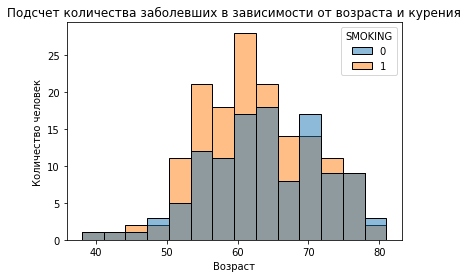

In [87]:
hp = sns.histplot(data=data_for_plot[data_for_plot['LUNG_CANCER'] == 1], x='AGE', color='burlywood', bins = 14, hue = 'SMOKING')
hp.set_title('Подсчет количества заболевших в зависимости от возраста и курения');
hp.set_xlabel('Возраст')
hp.set_ylabel('Количество человек');

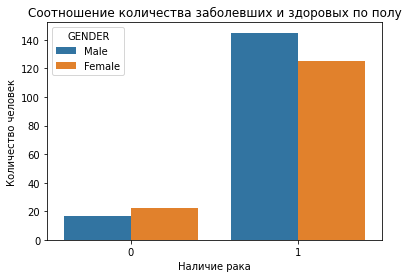

In [88]:
cp = sns.countplot(x='LUNG_CANCER', hue='GENDER', data=data_for_plot);
cp.set_title('Соотношение количества заболевших и здоровых по полу');
cp.set_xlabel('Наличие рака')
cp.set_ylabel('Количество человек');

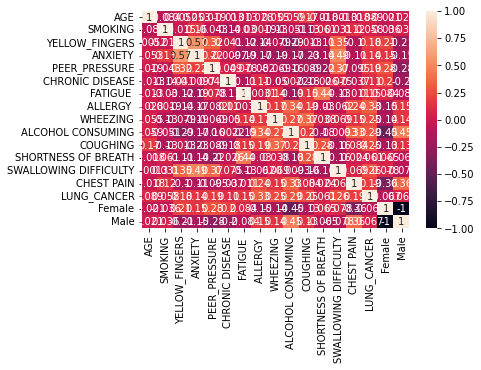

In [89]:
sns.heatmap(data.corr(), annot=True) #Тепловая карта корреляции

In [109]:
data_array

array([[ 0.72817582, -1.09108945,  0.85781645, ...,  0.39957961,
        -0.97142265,  0.97142265],
       [ 1.32596442,  0.91651514, -1.16575056, ...,  0.39957961,
        -0.97142265,  0.97142265],
       [-0.46740138, -1.09108945, -1.16575056, ..., -2.5026302 ,
         1.02941804, -1.02941804],
       ...,
       [-0.94563226,  0.91651514, -1.16575056, ..., -2.5026302 ,
        -0.97142265,  0.97142265],
       [-2.02165174, -1.09108945,  0.85781645, ..., -2.5026302 ,
        -0.97142265,  0.97142265],
       [-0.34784366, -1.09108945,  0.85781645, ...,  0.39957961,
        -0.97142265,  0.97142265]])

In [110]:
list(data)

['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER',
 'Female',
 'Male']

In [111]:
feat = ['AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'Female',
 'Male'];
x = data[feat];
y = data['LUNG_CANCER']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2) #Разделяем данные на тренировочную и тестовую части в соотношении 80/20

In [122]:
len(x_train), len(x_test), len(y_train), len(y_test)

(220, 56, 220, 56)

In [123]:
lr = LogisticRegression(); #Воспользуемся регрессией
lr.fit(x_train, y_train);
lr_pred = lr.predict(x_test);
lr_report = classification_report(y_test, lr_pred);
lr_acc  = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2);
print(f'\nClassification Report: \n\n{lr_report}');
print(f'\nThe Accuracy of Logistic Regression is {lr_acc} %');


Classification Report: 

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.94      0.98      0.96        50

    accuracy                           0.93        56
   macro avg       0.85      0.74      0.78        56
weighted avg       0.92      0.93      0.92        56


The Accuracy of Logistic Regression is 92.86 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
